In [1]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns

In [2]:
def smooth(y,w=41,o=1,d=5):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,d)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

In [3]:
df10 = pd.read_csv('competition_csv/demand_comm_0.2_fare_1.0.csv')
df12 = pd.read_csv('competition_csv/demand_comm_0.2_fare_1.2.csv')
df14 = pd.read_csv('competition_csv/demand_comm_0.2_fare_1.4.csv')
df16 = pd.read_csv('competition_csv/demand_comm_0.2_fare_1.6.csv')
df18 = pd.read_csv('competition_csv/demand_comm_0.2_fare_1.8.csv')
df20 = pd.read_csv('competition_csv/demand_comm_0.2_fare_2.0.csv')

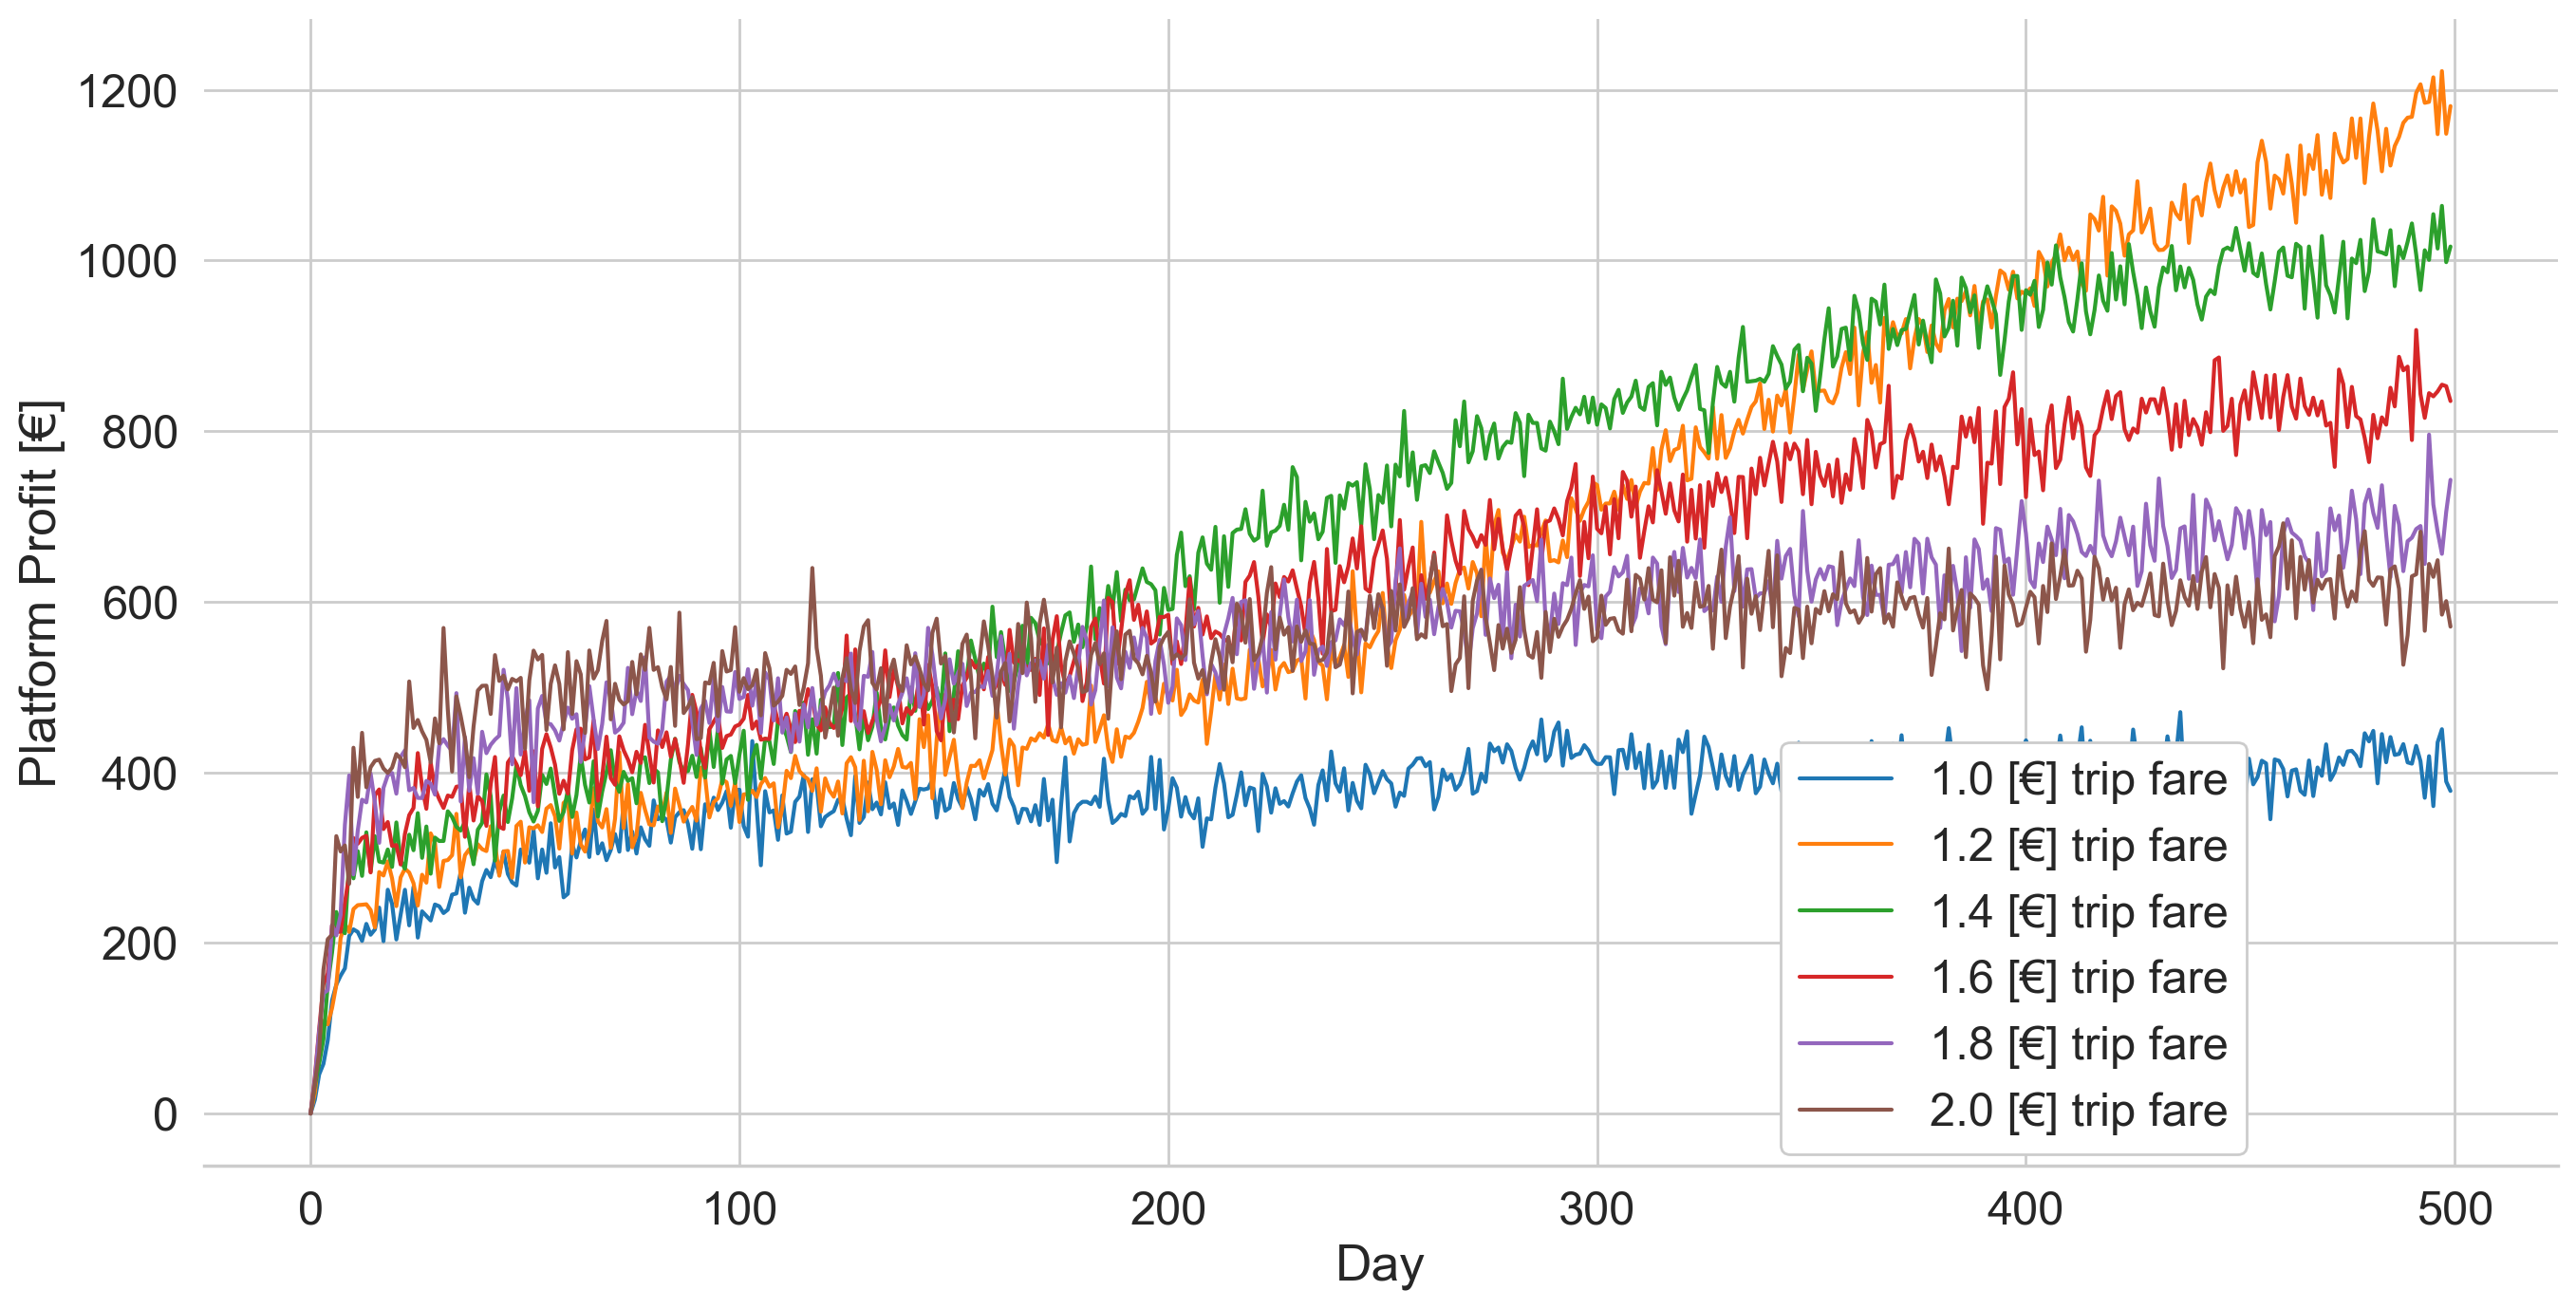

In [4]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,8))
sns.despine(left=True)

sns.lineplot(x=df10.index, y=df10.plat_revenue, label='1.0 [€] trip fare')
sns.lineplot(x=df12.index, y=df12.plat_revenue, label='1.2 [€] trip fare')
sns.lineplot(x=df14.index, y=df14.plat_revenue, label='1.4 [€] trip fare')
sns.lineplot(x=df16.index, y=df16.plat_revenue, label='1.6 [€] trip fare')
sns.lineplot(x=df18.index, y=df18.plat_revenue, label='1.8 [€] trip fare')
sns.lineplot(x=df20.index, y=df20.plat_revenue, label='2.0 [€] trip fare')

ax.set(xlabel='Day', ylabel='Platform Profit [€]')
ax.legend(frameon=True,framealpha=1, loc=(0.67,0.01))

[Text(0.5, 0, 'Day'), Text(0, 0.5, 'Platform Profit [€]')]

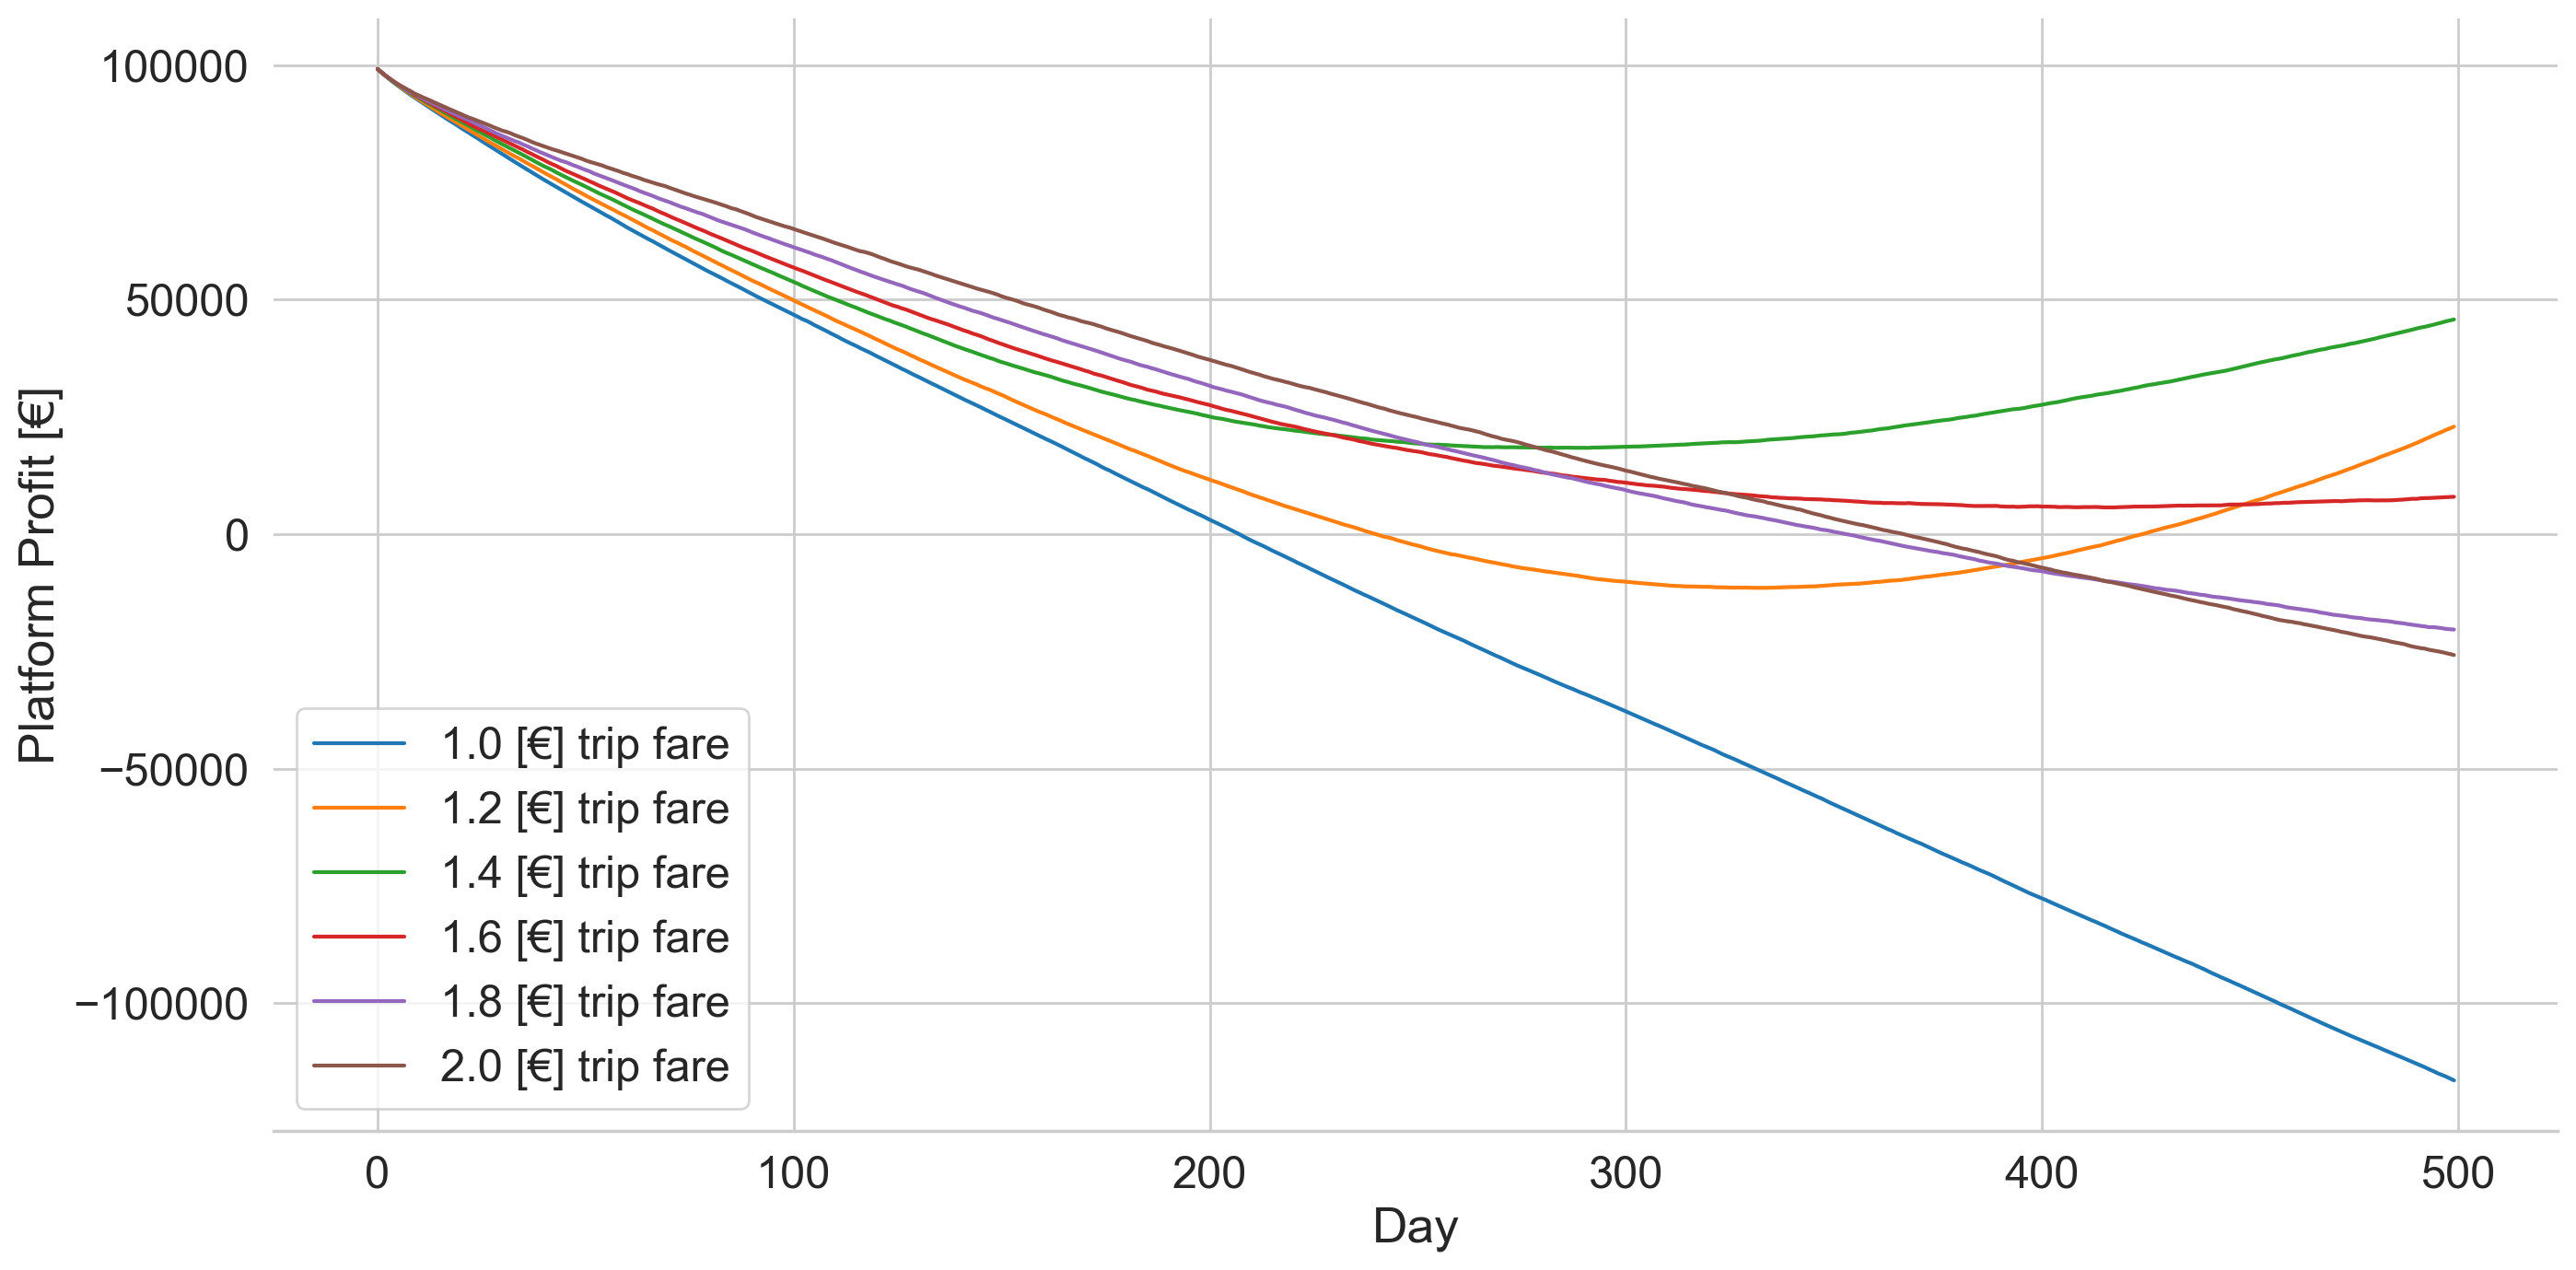

In [5]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,8))
sns.despine(left=True)

initial_capital = 100000
expense_per_day = 800 # euro

# 70000, 800

df10['daily_profit'] = df10.plat_revenue-expense_per_day
df10['remaining_capital'] = initial_capital + (df10.daily_profit.cumsum())

df12['daily_profit'] = df12.plat_revenue-expense_per_day
df12['remaining_capital'] = initial_capital + (df12.daily_profit.cumsum())

df14['daily_profit'] = df14.plat_revenue-expense_per_day
df14['remaining_capital'] = initial_capital + (df14.daily_profit.cumsum())

df16['daily_profit'] = df16.plat_revenue-expense_per_day
df16['remaining_capital'] = initial_capital + (df16.daily_profit.cumsum())

df18['daily_profit'] = df18.plat_revenue-expense_per_day
df18['remaining_capital'] = initial_capital + (df18.daily_profit.cumsum())

df20['daily_profit'] = df20.plat_revenue-expense_per_day
df20['remaining_capital'] = initial_capital + (df20.daily_profit.cumsum())


sns.lineplot(x=df10.index, y=df10.remaining_capital, label='1.0 [€] trip fare')
sns.lineplot(x=df12.index, y=df12.remaining_capital, label='1.2 [€] trip fare')
sns.lineplot(x=df14.index, y=df14.remaining_capital, label='1.4 [€] trip fare')
sns.lineplot(x=df16.index, y=df16.remaining_capital, label='1.6 [€] trip fare')
sns.lineplot(x=df18.index, y=df18.remaining_capital, label='1.8 [€] trip fare')
sns.lineplot(x=df20.index, y=df20.remaining_capital, label='2.0 [€] trip fare')

ax.set(xlabel='Day', ylabel='Platform Profit [€]')
# ax.legend(frameon=True,framealpha=1, loc=(0.67,0.01))

Two platforms are competing with separate pools of travelers and drivers (no multi-homing).
Initial capital = 100000 [€] & Platform expenses = 800 [€/day]


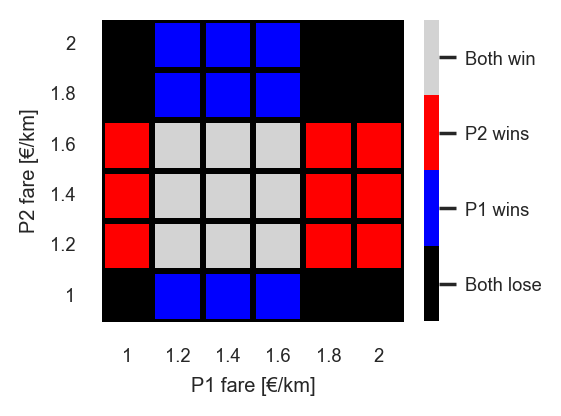

In [6]:
# I would use the grid illustration below in future:
# https://docs.dkrz.de/doc/visualization/sw/python/source_code/python-matplotlib-example-quality-points-per-grid-cell-plot.html

sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
plt.figure(figsize=(2.5, 2))
sns.set(palette='tab10',font_scale=0.6)

# Create a 6x6 grid
grid_size = 6
grid = np.zeros((grid_size, grid_size))

values = {0: df10, 1: df12, 2: df14, 3: df16, 4: df18, 5: df20}

# Define a condition for coloring the cells
for i in range(grid_size):
    for j in range(grid_size):
        p2 = values[i].iloc[-1].remaining_capital
        p1 = values[j].iloc[-1].remaining_capital
        
        if p1<0 and p2<0:
            grid[i, j] = 0
        elif p1>0 and p2>0:
            grid[i, j] = 3
        elif p1>0 and p2<0:
            grid[i, j] = 1
        elif p1<0 and p2>0:
            grid[i, j] = 2


grid = grid[::-1]
    
# Convert the data to a DataFrame
grid_df = pd.DataFrame(grid)

# Create a color palette: 0 -> white, 1 -> blue
cmap = sns.color_palette(["black", "blue", "red", "lightgrey"])

# Plot the grid
ax = sns.heatmap(grid_df, cmap=cmap, vmin=0, vmax=3, cbar=True, square=True, linewidths=2, linecolor='black')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.375, 1.125, 1.875, 2.625])
colorbar.set_ticklabels(['Both lose', 'P1 wins', 'P2 wins', 'Both win'])

xticks = [1, 1.2, 1.4, 1.6, 1.8, 2]
plt.xticks(ticks=np.arange(0.5, grid_size), labels=xticks, rotation=0)

yticks = xticks[::-1]
plt.yticks(ticks=np.arange(0.5, grid_size), labels=yticks, rotation=0)

plt.xlabel('P1 fare [€/km]')
plt.ylabel('P2 fare [€/km]')

print('Two platforms are competing with separate pools of travelers and drivers (no multi-homing).')
print('Initial capital = {} [€] & Platform expenses = {} [€/day]'.format(initial_capital,expense_per_day)) 
plt.show()

In [ ]:
=============================================================================================================

In [7]:
d1_1 = pd.read_csv('competition_csv/demand_p1_1.0_p2_1.0_200_2000.csv')
d1_12 = pd.read_csv('competition_csv/demand_p1_1.0_p2_1.2_200_2000.csv')
d1_14 = pd.read_csv('competition_csv/demand_p1_1.0_p2_1.4_200_2000.csv')
d1_16 = pd.read_csv('competition_csv/demand_p1_1.0_p2_1.6_200_2000.csv')
d12_12 = pd.read_csv('competition_csv/demand_p1_1.2_p2_1.2_200_2000.csv')
d12_14 = pd.read_csv('competition_csv/demand_p1_1.2_p2_1.4_200_2000.csv')
d12_16 = pd.read_csv('competition_csv/demand_p1_1.2_p2_1.6_200_2000.csv')
d14_14 = pd.read_csv('competition_csv/demand_p1_1.4_p2_1.4_200_2000.csv')
d14_16 = pd.read_csv('competition_csv/demand_p1_1.4_p2_1.6_200_2000.csv')
d16_16 = pd.read_csv('competition_csv/demand_p1_1.6_p2_1.6_200_2000.csv')

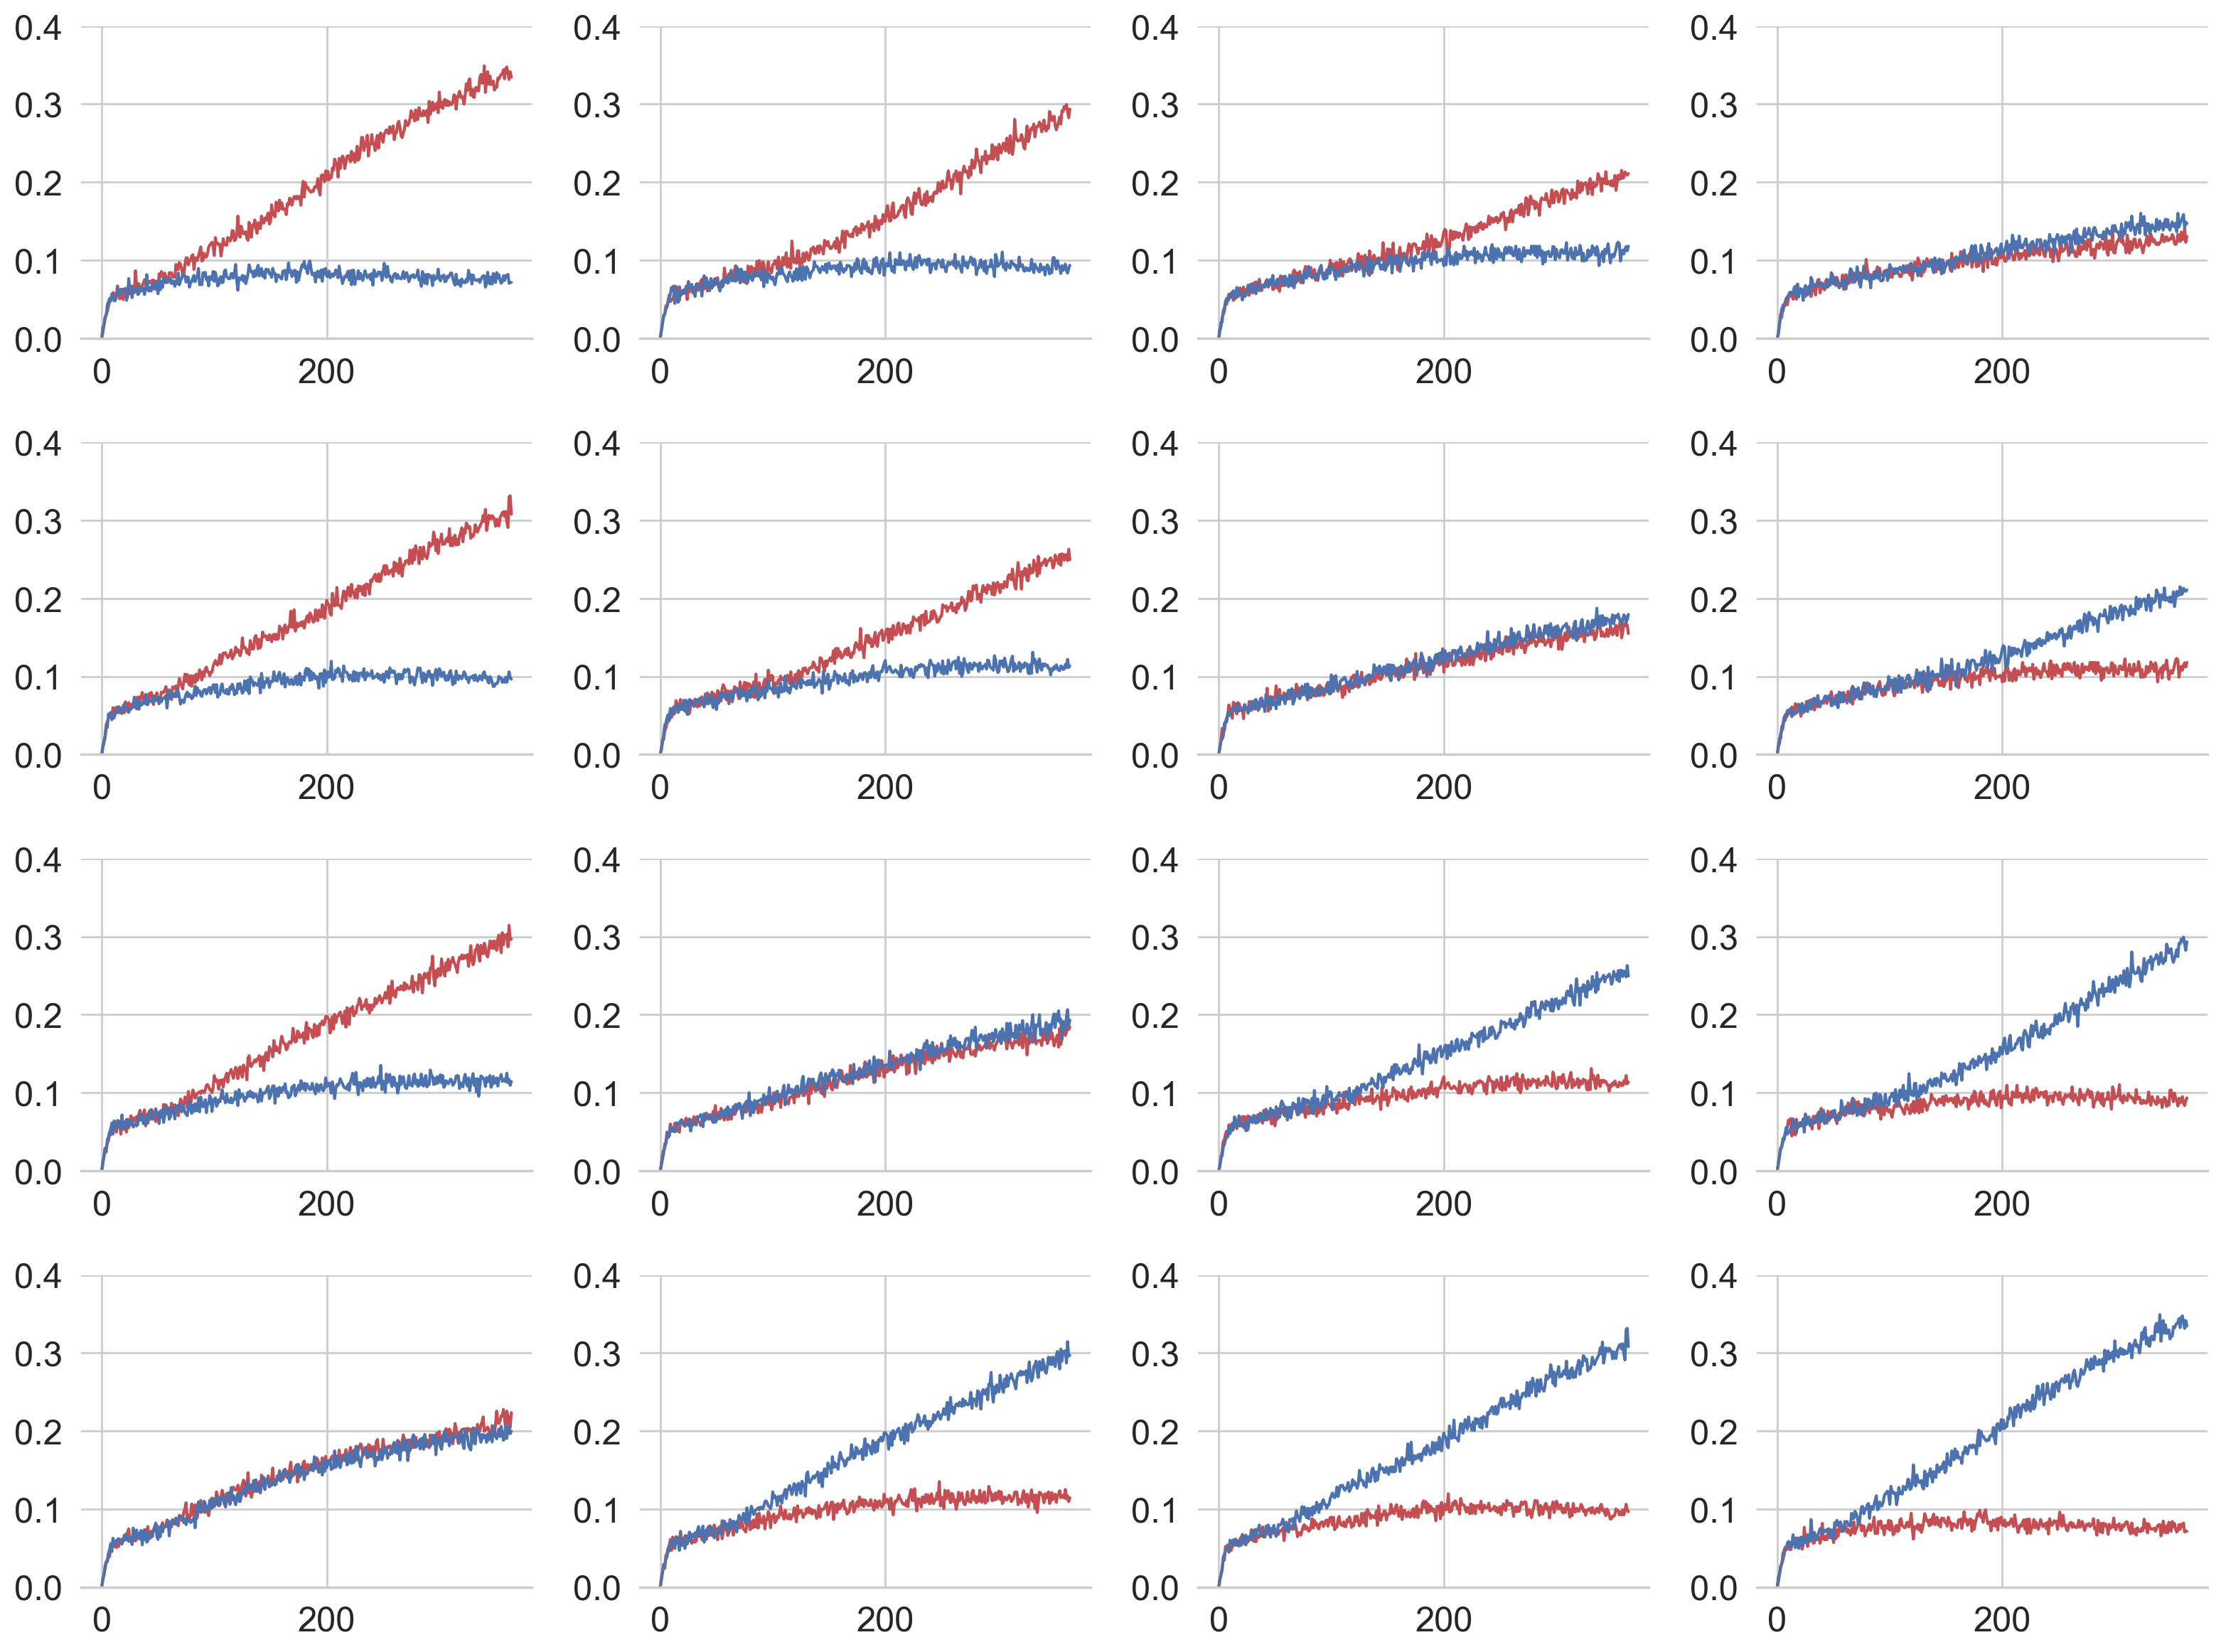

In [8]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16,12))
sns.despine(left=True)

nP = 2000
c1 = 'r'
c2 = 'b'

sns.lineplot(x=d1_1.index, y=d1_1.P1_OUT/nP, ax=ax[3,0], c=c1)
sns.lineplot(x=d1_1.index, y=d1_1.P2_OUT/nP, ax=ax[3,0], c=c2)
sns.lineplot(x=d1_12.index, y=d1_12.P2_OUT/nP, ax=ax[3,1], c=c1)
sns.lineplot(x=d1_12.index, y=d1_12.P1_OUT/nP, ax=ax[3,1], c=c2)
sns.lineplot(x=d1_14.index, y=d1_14.P2_OUT/nP, ax=ax[3,2], c=c1)
sns.lineplot(x=d1_14.index, y=d1_14.P1_OUT/nP, ax=ax[3,2], c=c2)
sns.lineplot(x=d1_16.index, y=d1_16.P2_OUT/nP, ax=ax[3,3], c=c1)
sns.lineplot(x=d1_16.index, y=d1_16.P1_OUT/nP, ax=ax[3,3], c=c2)

sns.lineplot(x=d1_12.index, y=d1_12.P1_OUT/nP, ax=ax[2,0], c=c1)
sns.lineplot(x=d1_12.index, y=d1_12.P2_OUT/nP, ax=ax[2,0], c=c2)
sns.lineplot(x=d12_12.index, y=d12_12.P1_OUT/nP, ax=ax[2,1], c=c1)
sns.lineplot(x=d12_12.index, y=d12_12.P2_OUT/nP, ax=ax[2,1], c=c2)
sns.lineplot(x=d12_14.index, y=d12_14.P2_OUT/nP, ax=ax[2,2], c=c1)
sns.lineplot(x=d12_14.index, y=d12_14.P1_OUT/nP, ax=ax[2,2], c=c2)
sns.lineplot(x=d12_16.index, y=d12_16.P2_OUT/nP, ax=ax[2,3], c=c1)
sns.lineplot(x=d12_16.index, y=d12_16.P1_OUT/nP, ax=ax[2,3], c=c2)

sns.lineplot(x=d1_14.index, y=d1_14.P1_OUT/nP, ax=ax[1,0], c=c1)
sns.lineplot(x=d1_14.index, y=d1_14.P2_OUT/nP, ax=ax[1,0], c=c2)
sns.lineplot(x=d12_14.index, y=d12_14.P1_OUT/nP, ax=ax[1,1], c=c1)
sns.lineplot(x=d12_14.index, y=d12_14.P2_OUT/nP, ax=ax[1,1], c=c2)
sns.lineplot(x=d14_14.index, y=d14_14.P1_OUT/nP, ax=ax[1,2], c=c1)
sns.lineplot(x=d14_14.index, y=d14_14.P2_OUT/nP, ax=ax[1,2], c=c2)
sns.lineplot(x=d14_16.index, y=d14_16.P2_OUT/nP, ax=ax[1,3], c=c1)
sns.lineplot(x=d14_16.index, y=d14_16.P1_OUT/nP, ax=ax[1,3], c=c2)

sns.lineplot(x=d1_16.index, y=d1_16.P1_OUT/nP, ax=ax[0,0], c=c1)
sns.lineplot(x=d1_16.index, y=d1_16.P2_OUT/nP, ax=ax[0,0], c=c2)
sns.lineplot(x=d12_16.index, y=d12_16.P1_OUT/nP, ax=ax[0,1], c=c1)
sns.lineplot(x=d12_16.index, y=d12_16.P2_OUT/nP, ax=ax[0,1], c=c2)
sns.lineplot(x=d14_16.index, y=d14_16.P1_OUT/nP, ax=ax[0,2], c=c1)
sns.lineplot(x=d14_16.index, y=d14_16.P2_OUT/nP, ax=ax[0,2], c=c2)
sns.lineplot(x=d16_16.index, y=d16_16.P1_OUT/nP, ax=ax[0,3], c=c1)
sns.lineplot(x=d16_16.index, y=d16_16.P2_OUT/nP, ax=ax[0,3], c=c2)

for axes_row in ax:
    for axes in axes_row:
        axes.set(xlabel='', ylabel='', ylim=(0,0.4))

plt.tight_layout()

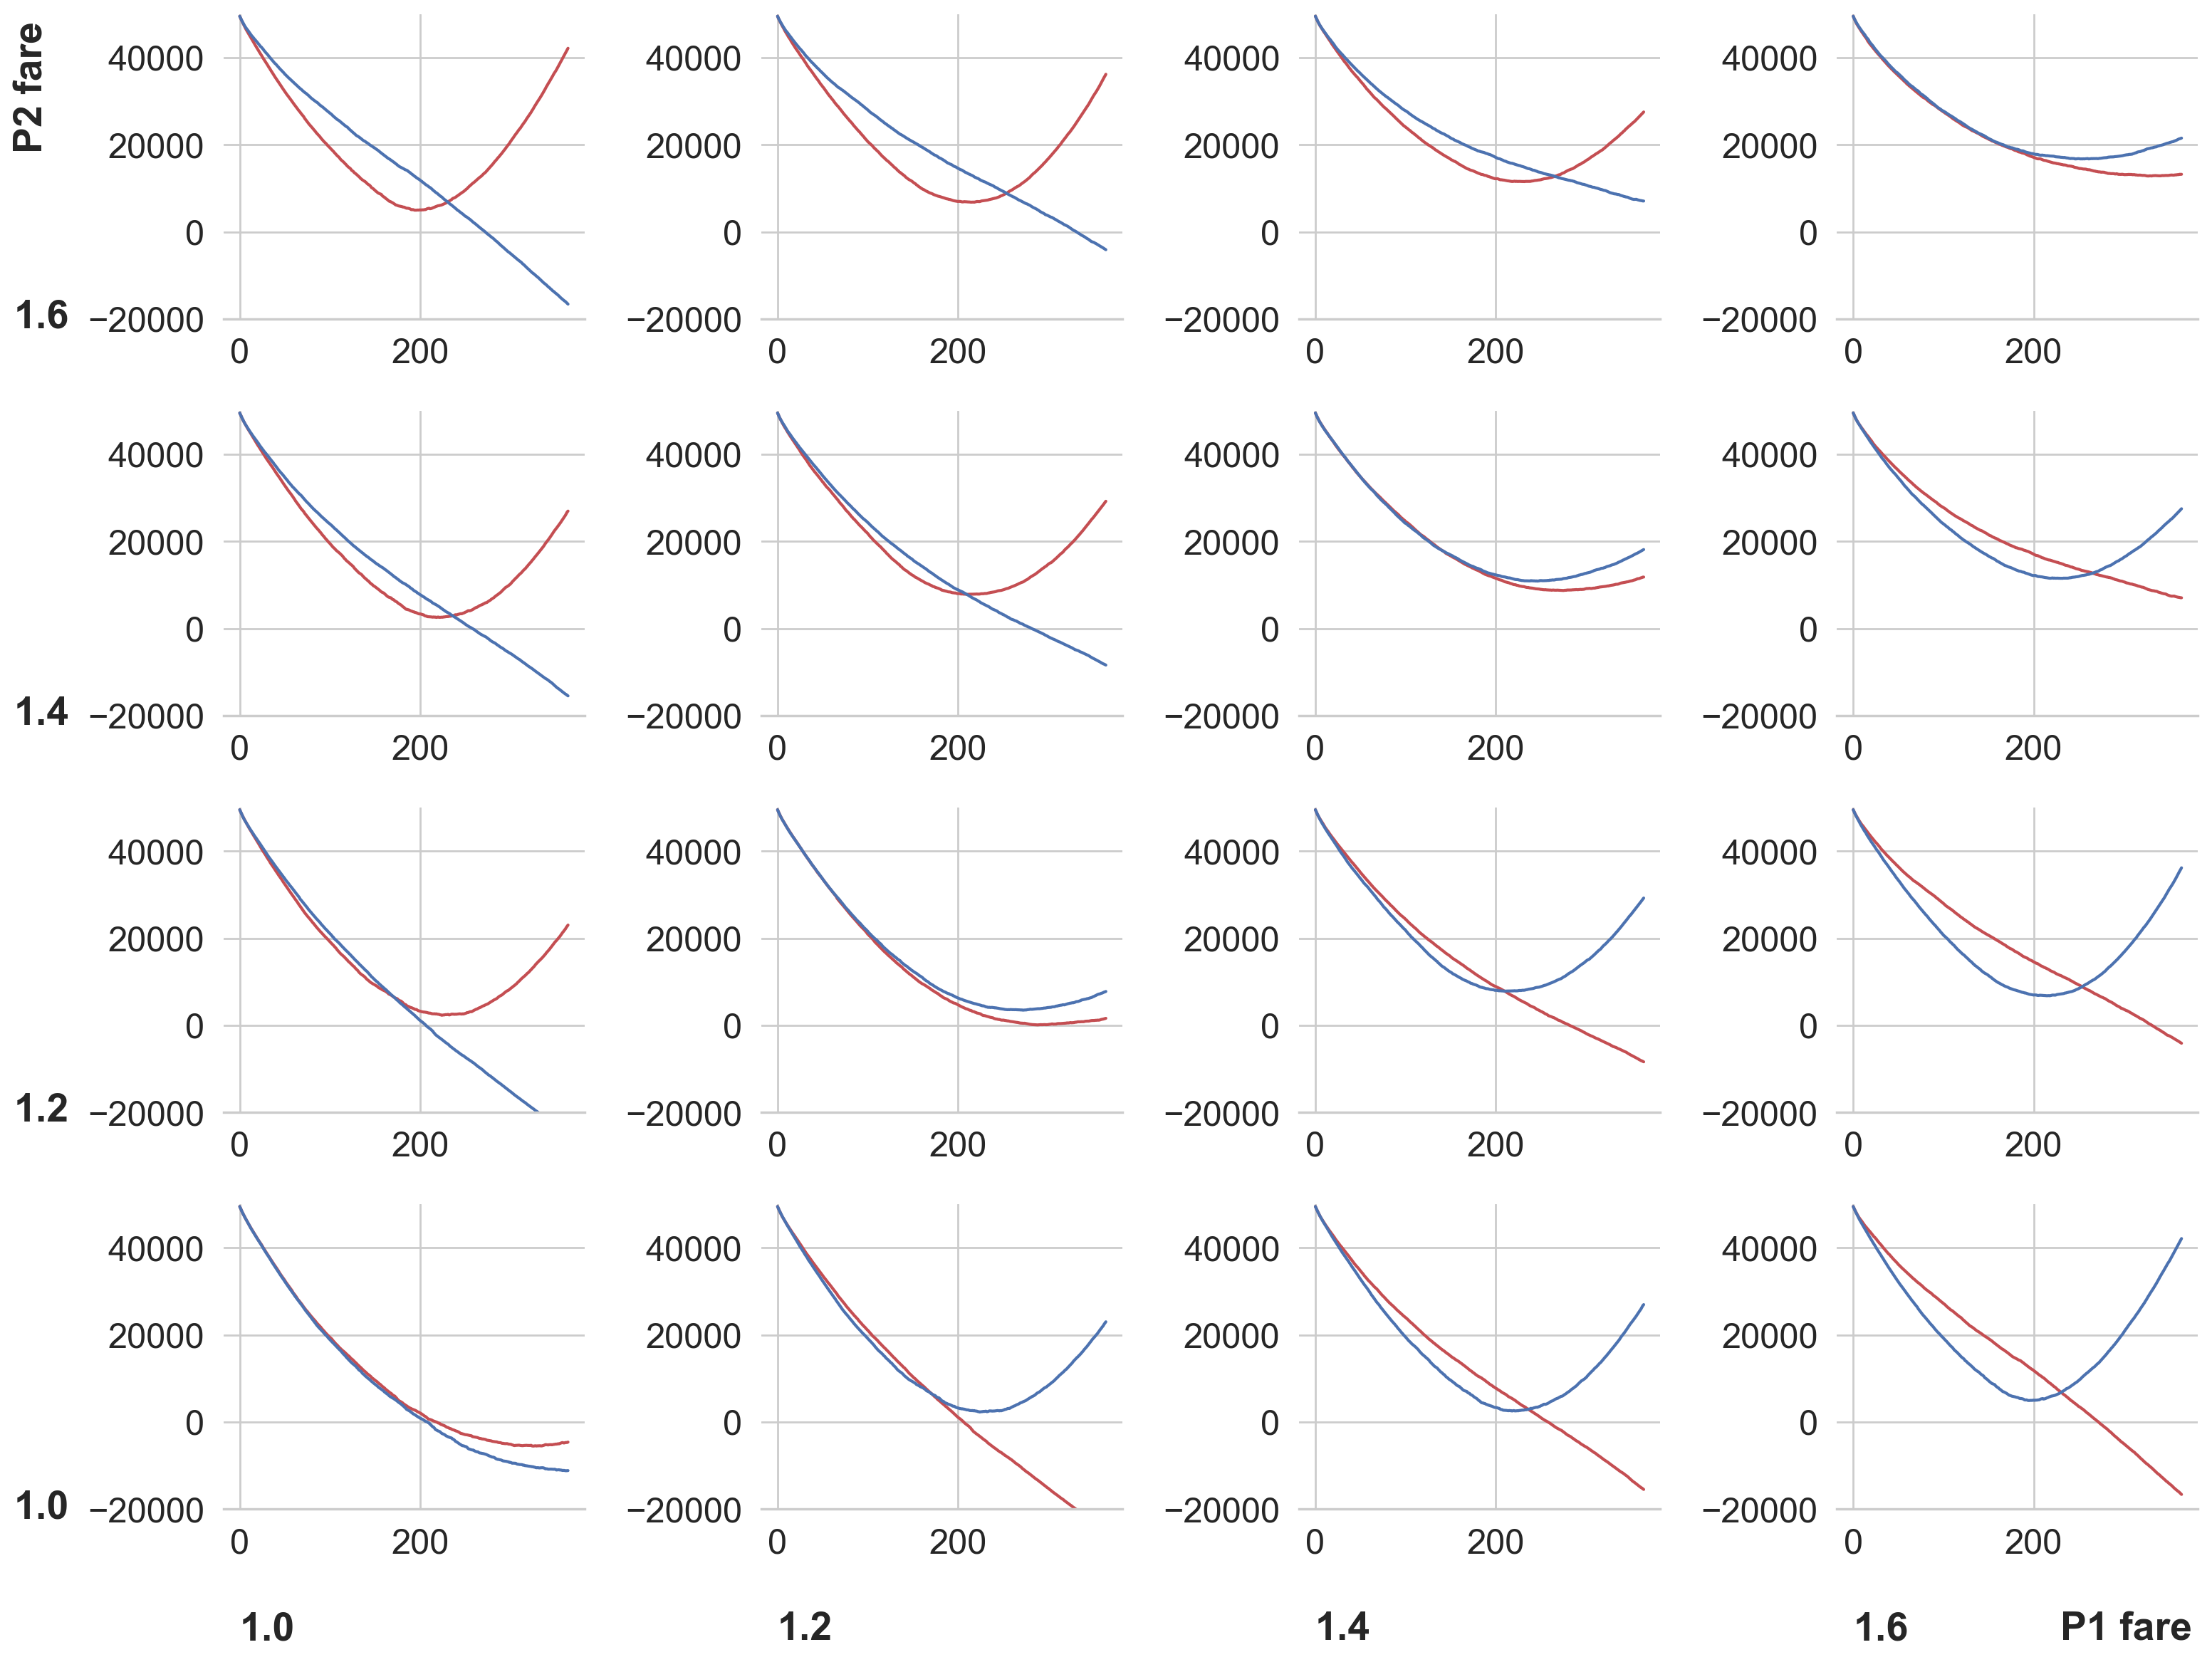

In [9]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16,12))
sns.despine(left=True)

initial_capital = 50000
expense_per_day = 500 # euro

df_list = [d1_1, d1_12, d1_14, d1_16, d12_12, d12_14, d12_16, d14_14, d14_16, d16_16]
for df in df_list:
    df['P1_daily_profit'] = df.P1_plat_revenue-expense_per_day
    df['P1_remaining_capital'] = initial_capital + (df.P1_daily_profit.cumsum())
    df['P2_daily_profit'] = df.P2_plat_revenue-expense_per_day
    df['P2_remaining_capital'] = initial_capital + (df.P2_daily_profit.cumsum())


c1 = 'r'
c2 = 'b'

sns.lineplot(x=d1_1.index, y=d1_1.P1_remaining_capital, ax=ax[3,0], c=c1)
sns.lineplot(x=d1_1.index, y=d1_1.P2_remaining_capital, ax=ax[3,0], c=c2)
sns.lineplot(x=d1_12.index, y=d1_12.P2_remaining_capital, ax=ax[3,1], c=c1)
sns.lineplot(x=d1_12.index, y=d1_12.P1_remaining_capital, ax=ax[3,1], c=c2)
sns.lineplot(x=d1_14.index, y=d1_14.P2_remaining_capital, ax=ax[3,2], c=c1)
sns.lineplot(x=d1_14.index, y=d1_14.P1_remaining_capital, ax=ax[3,2], c=c2)
sns.lineplot(x=d1_16.index, y=d1_16.P2_remaining_capital, ax=ax[3,3], c=c1)
sns.lineplot(x=d1_16.index, y=d1_16.P1_remaining_capital, ax=ax[3,3], c=c2)

sns.lineplot(x=d1_12.index, y=d1_12.P1_remaining_capital, ax=ax[2,0], c=c1)
sns.lineplot(x=d1_12.index, y=d1_12.P2_remaining_capital, ax=ax[2,0], c=c2)
sns.lineplot(x=d12_12.index, y=d12_12.P1_remaining_capital, ax=ax[2,1], c=c1)
sns.lineplot(x=d12_12.index, y=d12_12.P2_remaining_capital, ax=ax[2,1], c=c2)
sns.lineplot(x=d12_14.index, y=d12_14.P2_remaining_capital, ax=ax[2,2], c=c1)
sns.lineplot(x=d12_14.index, y=d12_14.P1_remaining_capital, ax=ax[2,2], c=c2)
sns.lineplot(x=d12_16.index, y=d12_16.P2_remaining_capital, ax=ax[2,3], c=c1)
sns.lineplot(x=d12_16.index, y=d12_16.P1_remaining_capital, ax=ax[2,3], c=c2)

sns.lineplot(x=d1_14.index, y=d1_14.P1_remaining_capital, ax=ax[1,0], c=c1)
sns.lineplot(x=d1_14.index, y=d1_14.P2_remaining_capital, ax=ax[1,0], c=c2)
sns.lineplot(x=d12_14.index, y=d12_14.P1_remaining_capital, ax=ax[1,1], c=c1)
sns.lineplot(x=d12_14.index, y=d12_14.P2_remaining_capital, ax=ax[1,1], c=c2)
sns.lineplot(x=d14_14.index, y=d14_14.P1_remaining_capital, ax=ax[1,2], c=c1)
sns.lineplot(x=d14_14.index, y=d14_14.P2_remaining_capital, ax=ax[1,2], c=c2)
sns.lineplot(x=d14_16.index, y=d14_16.P2_remaining_capital, ax=ax[1,3], c=c1)
sns.lineplot(x=d14_16.index, y=d14_16.P1_remaining_capital, ax=ax[1,3], c=c2)

sns.lineplot(x=d1_16.index, y=d1_16.P1_remaining_capital, ax=ax[0,0], c=c1)
sns.lineplot(x=d1_16.index, y=d1_16.P2_remaining_capital, ax=ax[0,0], c=c2)
sns.lineplot(x=d12_16.index, y=d12_16.P1_remaining_capital, ax=ax[0,1], c=c1)
sns.lineplot(x=d12_16.index, y=d12_16.P2_remaining_capital, ax=ax[0,1], c=c2)
sns.lineplot(x=d14_16.index, y=d14_16.P1_remaining_capital, ax=ax[0,2], c=c1)
sns.lineplot(x=d14_16.index, y=d14_16.P2_remaining_capital, ax=ax[0,2], c=c2)
sns.lineplot(x=d16_16.index, y=d16_16.P1_remaining_capital, ax=ax[0,3], c=c1)
sns.lineplot(x=d16_16.index, y=d16_16.P2_remaining_capital, ax=ax[0,3], c=c2)

for axes_row in ax:
    for axes in axes_row:
        axes.set(xlabel='', ylabel='', ylim=(-20000,50000))
        
ax[0][0].text(x=-250 ,y=20000, s='P2 fare',fontweight='bold',fontsize=20, rotation=90)
ax[0][0].text(x=-250 ,y=-22000, s='1.6',fontweight='bold',fontsize=20)
ax[1][0].text(x=-250 ,y=-22000, s='1.4',fontweight='bold',fontsize=20)
ax[2][0].text(x=-250 ,y=-22000, s='1.2',fontweight='bold',fontsize=20)
ax[3][0].text(x=-250 ,y=-22000, s='1.0',fontweight='bold',fontsize=20)

ax[3][3].text(x=230 ,y=-50000, s='P1 fare',fontweight='bold',fontsize=20)
ax[3][3].text(x=0 ,y=-50000, s='1.6',fontweight='bold',fontsize=20)
ax[3][2].text(x=0 ,y=-50000, s='1.4',fontweight='bold',fontsize=20)
ax[3][1].text(x=0 ,y=-50000, s='1.2',fontweight='bold',fontsize=20)
ax[3][0].text(x=0 ,y=-50000, s='1.0',fontweight='bold',fontsize=20)

plt.tight_layout()

In [10]:
col1 = 'P1_remaining_capital'; col2 = 'P2_remaining_capital'
d12_1 = d1_12.rename(columns={'P1_remaining_capital': 'P2_remaining_capital', 'P2_remaining_capital':'P1_remaining_capital'})
d14_1 = d1_14.rename(columns={'P1_remaining_capital': 'P2_remaining_capital', 'P2_remaining_capital':'P1_remaining_capital'})
d16_1 = d1_16.rename(columns={'P1_remaining_capital': 'P2_remaining_capital', 'P2_remaining_capital':'P1_remaining_capital'})
d12_1 = d1_12.rename(columns={'P1_remaining_capital': 'P2_remaining_capital', 'P2_remaining_capital':'P1_remaining_capital'})
d14_12 = d12_14.rename(columns={'P1_remaining_capital': 'P2_remaining_capital', 'P2_remaining_capital':'P1_remaining_capital'})
d16_12 = d12_16.rename(columns={'P1_remaining_capital': 'P2_remaining_capital', 'P2_remaining_capital':'P1_remaining_capital'})
d16_14 = d14_16.rename(columns={'P1_remaining_capital': 'P2_remaining_capital', 'P2_remaining_capital':'P1_remaining_capital'})


In [18]:
grid_size = 4
grid = np.zeros((grid_size, grid_size), dtype=object)
point_grid = np.zeros((grid_size, grid_size), dtype=object)

values = {0: {0:d1_1, 1:d12_1, 2:d14_1, 3:d16_1}, 
          1: {0:d1_12, 1:d12_12, 2:d14_12, 3:d16_12}, 
          2: {0:d1_14, 1:d12_14, 2:d14_14, 3:d16_14}, 
          3: {0:d1_16, 1:d12_16, 2:d14_16, 3:d16_16}}

# Define a condition for coloring the cells
for i in range(grid_size):
    for j in range(grid_size):

        p1 = values[i][j].iloc[-1].P1_remaining_capital
        p2 = values[i][j].iloc[-1].P2_remaining_capital
        
        point_grid[i, j] = (p2,p1)
        grid[i, j] = p1-p2
        
# grid = grid[::-1]

# Save the matrix to a CSV file
np.save('point_grid.npy', point_grid)

# Load the matrix from the binary file
loaded_point_grid = np.load('point_grid.npy', allow_pickle=True)

assert np.array_equal(point_grid, loaded_point_grid), "The grids are not the same!"

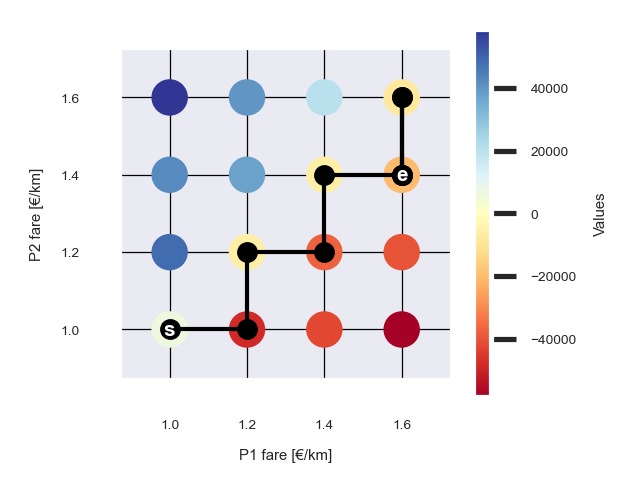

In [36]:
# Set global seaborn and matplotlib parameters
sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 200})
sns.set_palette('tab10')
sns.set(font_scale=0.3)

# Define the range of values for x and y axes
x = np.array([1.0, 1.2, 1.4, 1.6])
y = np.array([1.0, 1.2, 1.4, 1.6])

values = grid

# Create the meshgrid
X, Y = np.meshgrid(x, y)

# Visualize the meshgrid
plt.figure(figsize=(2, 2))  # Adjust figure size as per your requirement
plt.scatter(X, Y, c=values, cmap='RdYlBu', s=60)
plt.title("")
plt.xlabel('P1 fare [€/km]')
plt.ylabel('P2 fare [€/km]')

# Customize ticks and grid lines
plt.xticks(x)
plt.yticks(y)
plt.grid(True, color='black', which='both', linestyle='-', linewidth=0.3, )  # Show grid lines for both major and minor ticks

e = 0.13
plt.xlim(x.min()-e, x.max()+e)
plt.ylim(y.min()-e, x.max()+e)

cbar = plt.colorbar(shrink=0.7) # use shrink to adjust the colorbar width
cbar.ax.set_aspect(20) # use to adjust colorbar height
cbar.set_label('Values')

# Plotting the trajectory
trajectory_points = [(1.0, 1.0),(1.0, 1.2),(1.2, 1.2),(1.2, 1.4),(1.4, 1.4),(1.4, 1.6),(1.4, 1.6),(1.4, 1.6),(1.6, 1.6),(1.6, 1.6),(1.4, 1.6)]
trajectory_x, trajectory_y = zip(*trajectory_points)
plt.plot(trajectory_y, trajectory_x, marker='o', color='black', linestyle='-', linewidth=1, markersize=4)
plt.text(trajectory_y[0], trajectory_x[0], 's', color='white', fontsize=5, fontweight='bold', ha='center', va='center')
plt.text(trajectory_y[-1], trajectory_x[-1], 'e', color='white', fontsize=5, fontweight='bold', ha='center', va='center')

# Set aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

# plt.gca().set_facecolor('white')
plt.tight_layout()  # Ensures everything fits within the figure area properly
plt.show()

# Competition Game

### Game Initialization
- Platforms' initial capital, expenses per day are set, and trunover interval.

### Game Rules
1. The game starts on a random cell.
2. Platforms can make turn-based moves to adjacent cells.
3. On each move, platforms carry their gains and losses to the next cell. This means platforms' movements generate a trajectory on the grid.
4. The game continues until one platform reaches negative capital (or until both platforms stabilize their state even if one platform is already out of the game).

### Dimensions to Explore with Experiments
1. **Output Equilibrium**: 
   - Market-sharing
   - Winner takes it all
   - Tragedy of the commons
2. **Initial Capital**:
   - Low
   - Medium
   - High
3. **Starting Position**
   - Both platforms start with the same fares (low or high fares)
   - They start with different fares
4. **Multi-homing Impact**
   - considering different frequency of switching between platforms
5. **Regulations Impact**
   - Minimum wage regulations (like it happened in 2019 in NYC)
   - Maximum trip fare
   - Cap on the number of drivers

Modifying (increasing/decreasing) trip fare has mixed effects: 
1. On the one hand it encourages the travellers to leave/join the platform
2. On the other hand encourages more/less drivers to join the platform

Increasing market share of platform (both supply and demand) reduces price elasticity of demand. Platforms can benefit this to increase the price without singificantly affecting the demand market share.


In [ ]:
Initial experiments:
1- Both platforms start with low fare
2- Both platforms start with high fare
3- one of them start with low and the other on start with high

Consider infinite capital first, then populate the results for low, medium, and high capitals. 